In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import Perceptron


from sklearn.model_selection import train_test_split

le = LabelEncoder()

__1)	Load the dataset that is given to me__

In [2]:
df = pd.read_csv('loan_data.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


__2)Check for null values in the dataset__

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
pd.set_option('display.max_rows',None)
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [27]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(skipna=True), inplace=True)
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(skipna=True), inplace=True)
#df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].median(skipna=True), inplace=True)
df['OWN_CAR_AGE'].fillna(df['OWN_CAR_AGE'].median(skipna=True), inplace=True)
#df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].median(skipna=True), inplace=True)
df['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].median(skipna=True), inplace=True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(skipna=True), inplace=True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].median(skipna=True), inplace=True)
df['APARTMENTS_AVG'].fillna(df['APARTMENTS_AVG'].median(skipna=True), inplace=True)
df['BASEMENTAREA_AVG'].fillna(df['BASEMENTAREA_AVG'].median(skipna=True), inplace=True)
df['YEARS_BEGINEXPLUATATION_AVG'].fillna(df['YEARS_BEGINEXPLUATATION_AVG'].median(skipna=True), inplace=True)
df['YEARS_BUILD_AVG'].fillna(df['YEARS_BUILD_AVG'].median(skipna=True), inplace=True)
df['COMMONAREA_AVG'].fillna(df['COMMONAREA_AVG'].median(skipna=True), inplace=True)
df['ELEVATORS_AVG'].fillna(df['ELEVATORS_AVG'].median(skipna=True), inplace=True)
df['ENTRANCES_AVG'].fillna(df['ENTRANCES_AVG'].median(skipna=True), inplace=True)
df['FLOORSMAX_AVG'].fillna(df['FLOORSMAX_AVG'].median(skipna=True), inplace=True)
df['FLOORSMIN_AVG'].fillna(df['FLOORSMIN_AVG'].median(skipna=True), inplace=True)
df['LANDAREA_AVG'].fillna(df['LANDAREA_AVG'].median(skipna=True), inplace=True)
df['LIVINGAPARTMENTS_AVG'].fillna(df['LIVINGAPARTMENTS_AVG'].median(skipna=True), inplace=True)
df['LIVINGAREA_AVG'].fillna(df['LIVINGAREA_AVG'].median(skipna=True), inplace=True)
df['NONLIVINGAPARTMENTS_AVG'].fillna(df['NONLIVINGAPARTMENTS_AVG'].median(skipna=True), inplace=True)
df['NONLIVINGAREA_AVG'].fillna(df['NONLIVINGAREA_AVG'].median(skipna=True), inplace=True)
df['APARTMENTS_MODE'].fillna(df['APARTMENTS_MODE'].median(skipna=True), inplace=True)
df['BASEMENTAREA_MODE'].fillna(df['BASEMENTAREA_MODE'].median(skipna=True), inplace=True)
df['YEARS_BEGINEXPLUATATION_MODE'].fillna(df['YEARS_BEGINEXPLUATATION_MODE'].median(skipna=True), inplace=True)
df['YEARS_BUILD_MODE'].fillna(df['YEARS_BUILD_MODE'].median(skipna=True), inplace=True)
df['COMMONAREA_MODE'].fillna(df['COMMONAREA_MODE'].median(skipna=True), inplace=True)
df['ELEVATORS_MODE'].fillna(df['ELEVATORS_MODE'].median(skipna=True), inplace=True)
df['ENTRANCES_MODE'].fillna(df['ENTRANCES_MODE'].median(skipna=True), inplace=True)
df['FLOORSMAX_MODE'].fillna(df['FLOORSMAX_MODE'].median(skipna=True), inplace=True)
df['FLOORSMIN_MODE'].fillna(df['FLOORSMIN_MODE'].median(skipna=True), inplace=True)
df['LANDAREA_MODE'].fillna(df['LANDAREA_MODE'].median(skipna=True), inplace=True)
df['LIVINGAPARTMENTS_MODE'].fillna(df['LIVINGAPARTMENTS_MODE'].median(skipna=True), inplace=True)
df['LIVINGAREA_MODE'].fillna(df['LIVINGAREA_MODE'].median(skipna=True), inplace=True)
df['NONLIVINGAPARTMENTS_MODE'].fillna(df['NONLIVINGAPARTMENTS_MODE'].median(skipna=True), inplace=True)
df['NONLIVINGAREA_MODE'].fillna(df['NONLIVINGAREA_MODE'].median(skipna=True), inplace=True)
df['APARTMENTS_MEDI'].fillna(df['APARTMENTS_MEDI'].median(skipna=True), inplace=True)
df['BASEMENTAREA_MEDI'].fillna(df['BASEMENTAREA_MEDI'].median(skipna=True), inplace=True)
df['YEARS_BEGINEXPLUATATION_MEDI'].fillna(df['YEARS_BEGINEXPLUATATION_MEDI'].median(skipna=True), inplace=True)
df['YEARS_BUILD_MEDI'].fillna(df['YEARS_BUILD_MEDI'].median(skipna=True), inplace=True)
df['COMMONAREA_MEDI'].fillna(df['COMMONAREA_MEDI'].median(skipna=True), inplace=True)
df['ELEVATORS_MEDI'].fillna(df['ELEVATORS_MEDI'].median(skipna=True), inplace=True)
df['ENTRANCES_MEDI'].fillna(df['ENTRANCES_MEDI'].median(skipna=True), inplace=True)
df['FLOORSMAX_MEDI'].fillna(df['FLOORSMAX_MEDI'].median(skipna=True), inplace=True)
df['FLOORSMIN_MEDI'].fillna(df['FLOORSMIN_MEDI'].median(skipna=True), inplace=True)
df['LANDAREA_MEDI'].fillna(df['LANDAREA_MEDI'].median(skipna=True), inplace=True)
df['LIVINGAPARTMENTS_MEDI'].fillna(df['LIVINGAPARTMENTS_MEDI'].median(skipna=True), inplace=True)
df['LIVINGAREA_MEDI'].fillna(df['LIVINGAREA_MEDI'].median(skipna=True), inplace=True)
df['NONLIVINGAPARTMENTS_MEDI'].fillna(df['NONLIVINGAPARTMENTS_MEDI'].median(skipna=True), inplace=True)
df['NONLIVINGAREA_MEDI'].fillna(df['NONLIVINGAREA_MEDI'].median(skipna=True), inplace=True)
#df['FONDKAPREMONT_MODE'].fillna(df['FONDKAPREMONT_MODE'].median(skipna=True), inplace=True)
#df['HOUSETYPE_MODE'].fillna(df['HOUSETYPE_MODE'].median(skipna=True), inplace=True)
df['TOTALAREA_MODE'].fillna(df['TOTALAREA_MODE'].median(skipna=True), inplace=True)
#df['WALLSMATERIAL_MODE'].fillna(df['WALLSMATERIAL_MODE'].median(skipna=True), inplace=True)
#df['EMERGENCYSTATE_MODE'].fillna(df['EMERGENCYSTATE_MODE'].median(skipna=True), inplace=True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(skipna=True), inplace=True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(skipna=True), inplace=True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median(skipna=True), inplace=True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].median(skipna=True), inplace=True)
df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].median(skipna=True), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].median(skipna=True), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].median(skipna=True), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].median(skipna=True), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].median(skipna=True), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].median(skipna=True), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(skipna=True), inplace=True)
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median(skipna=True), inplace=True)


In [28]:
df.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

__3)Print the percentage of default to a payer of the dataset for the TARGET column__

In [29]:
print(sum(df.TARGET==1)/sum(df.TARGET==0)*100)

8.781828601345662


__4)Balance the dataset if the data is imbalanced__

<Axes: ylabel='TARGET'>

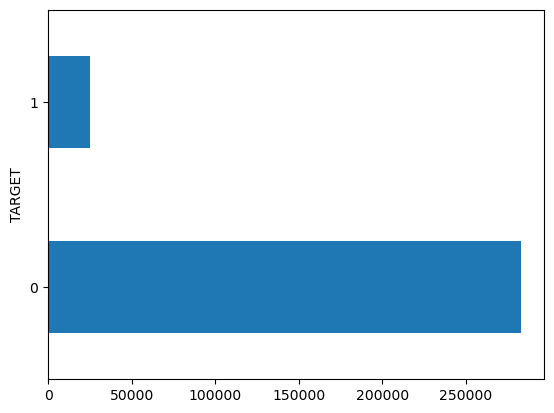

In [30]:
df.TARGET.value_counts().plot.barh()

__OBSERVATION:__
- We can notice that we have unbalance dataset, to make our model more
  accurate we can take a random sample from each one and make them my new dataset.

In [31]:
ONE_df = df[(df.TARGET == 1)]
ZERO_df = df[(df.TARGET == 0)]

print('ONE shape: {}'.format(ONE_df.shape))
print('ZERO shape: {}'.format(ZERO_df.shape))

ONE shape: (24825, 122)
ZERO shape: (282686, 122)


__Steps 4,5, and 5:__
- 4)Balance the dataset if the data is imbalanced.
- 5)Plot the balanced or imbalanced data.
- 6)Encode the columns that is required for the model.

In [32]:
df['NAME_CONTRACT_TYPE'] = le.fit_transform(df['NAME_CONTRACT_TYPE'])
df['CODE_GENDER'] = le.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = le.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = le.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_TYPE_SUITE'] = le.fit_transform(df['NAME_TYPE_SUITE'])
df['NAME_INCOME_TYPE'] = le.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])
df['OCCUPATION_TYPE'] = le.fit_transform(df['OCCUPATION_TYPE'])
df['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(df['WEEKDAY_APPR_PROCESS_START'])
df['ORGANIZATION_TYPE'] = le.fit_transform(df['ORGANIZATION_TYPE'])
df['FONDKAPREMONT_MODE'] = le.fit_transform(df['FONDKAPREMONT_MODE'])
df['HOUSETYPE_MODE'] = le.fit_transform(df['HOUSETYPE_MODE'])
df['WALLSMATERIAL_MODE'] = le.fit_transform(df['WALLSMATERIAL_MODE'])
df['EMERGENCYSTATE_MODE'] = le.fit_transform(df['EMERGENCYSTATE_MODE'])   

In [33]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
one_df = df[(df.TARGET == 1)]
zero_df = df[(df.TARGET == 0)]

print('ONE shape: {}'.format(one_df.shape))
print('ZERO shape: {}'.format(zero_df.shape))

ONE shape: (24825, 122)
ZERO shape: (282686, 122)


In [35]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['TARGET','SK_ID_CURR']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

<Axes: >

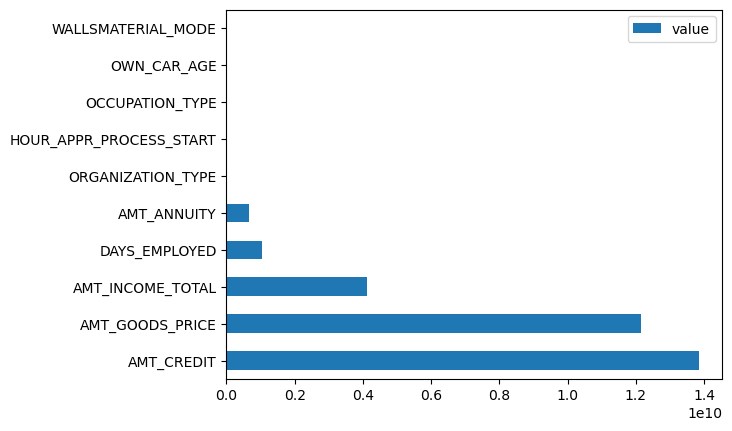

In [36]:
one_ingredient_df = create_ingredient_df(one_df)
one_ingredient_df.head(10).plot.barh()

<Axes: >

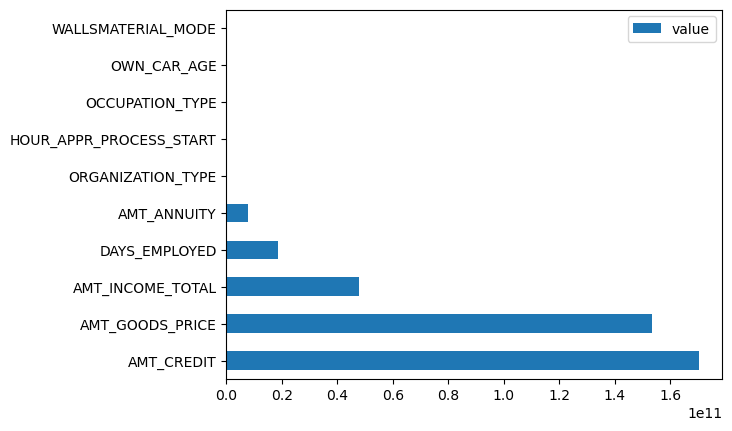

In [37]:
zero_ingredient_df = create_ingredient_df(zero_df)
zero_ingredient_df.head(10).plot.barh()

__OBSERVATIONS:__
- We can see that we have unbalanced data.

In [50]:
feature_df= df.drop(['TARGET','SK_ID_CURR'], axis=1)
labels_df = df.TARGET


oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df,labels_df)


In [51]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.TARGET.value_counts()}')

new label count: TARGET
1    282686
0    282686
Name: count, dtype: int64
old label count: TARGET
0    282686
1     24825
Name: count, dtype: int64


__Steps 7 and 8__
- Calculate Sensitivity as a metric
- Calculate the area under  the receiver operating characteristics curve

In [52]:
x_train,x_test,y_train,y_test = train_test_split(transformed_feature_df,transformed_label_df,test_size=0.2, random_state=4)

In [75]:
per = Perceptron()
per.fit(x_train, y_train)
pred = per.predict(x_test)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

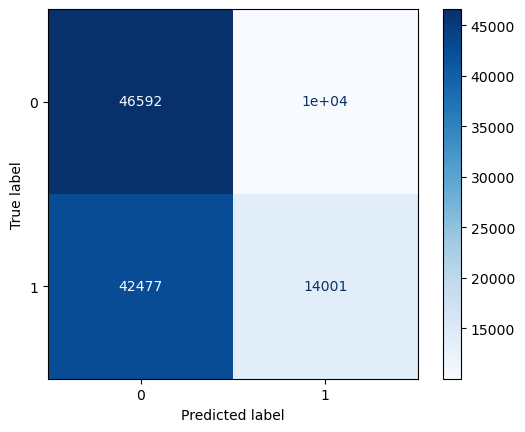

In [76]:
confusion_mat = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.52      0.82      0.64     56597
           1       0.58      0.25      0.35     56478

    accuracy                           0.54    113075
   macro avg       0.55      0.54      0.49    113075
weighted avg       0.55      0.54      0.49    113075



In [80]:
test_df = pd.DataFrame(
    {'True': y_test, 'Perceptron': pred})

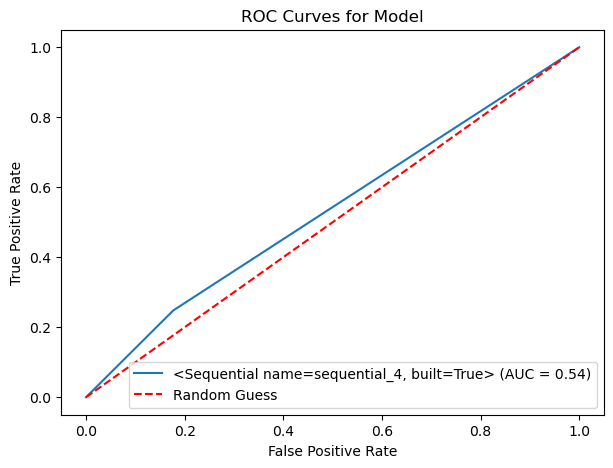

In [82]:
plt.figure(figsize=(7, 5))
fpr, tpr, _ = roc_curve(test_df['True'], test_df['Perceptron'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Model')
plt.legend()
plt.show()